In [273]:
# import necessary libraries

import numpy as np # numpy is used for arithmetic operations
import pandas as pd # pandas is used for reading and storing data 

## matplotlib and seaborn are used for plotting and visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

# Description of columns

- ID : Unique ID
- Gender : 	Gender of the customer
- Ever_Married : Marital status of the customer
- Age : Age of the customer
- Graduated : Is the customer a graduate?
- Profession : Profession of the customer
- Work_Experience : Work Experience in years
- Spending_Score : Spending score of the customer
- Family_Size : Number of family members for the customer (including the customer)
- Var_1 : Anonymised Category for the customer
- Segmentation : (target) Customer Segment of the customer

In [257]:
## Loading the train and test data sets into pandas dataframes

train_data = pd.read_csv("Train.csv")

test_data = pd.read_csv("Test.csv")

In [4]:
## Displaying the first 3 rows of train data
train_data.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


In [5]:
## Displaying the first 3 rows of test data
test_data.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A


In [40]:
## printing the number of rows and columns in train and test datasets
print(f" train shape :  {train_data.shape}")

print(f" test shape :  {test_data.shape}")

 train shape :  (8068, 11)
 test shape :  (2627, 11)


In [43]:
## Checking for the unique values present in target column

print("train : ",train_data.Segmentation.unique())

print("test : ", test_data.Segmentation.unique())

train :  ['D' 'A' 'B' 'C']
test :  ['B' 'A' 'C' 'D']


<b> Observations: </b><br>

- Independent variables :  There are 10 independent variables or predictors in the given data
- Response/target variable : The 'Segmentation' column is the target variable and it has 4 values : A, B, C, D
- These values represnt the groups into which variouss customer are allocated based on analysis given by sales team.
- This is a multi-class classification problem.

In [6]:
## printing the summary of train_data dataframe
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
## printing the summary of test_data dataframe
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


<b>observations :  </b><br>
- In both datasets several columns have missing values.
- The Target column is of datatype object. Some of the independent variables are numerical while other variables are categorical.

In [52]:
## statistical summary of dataset 

# describe method by default only prints the summary of numerical columns
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,8068.0,463479.214551,2595.381232,458982.0,461240.75,463472.5,465744.25,467974.0
Age,8068.0,43.466906,16.711696,18.0,30.00,40.0,53.00,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.00,1.0,4.00,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.00,3.0,4.00,9.0


In [54]:
# summary of categorical columns
train_data.describe(include=['O']).transpose()

,count,unique,top,freq
Gender,8068,2,Male,4417
Ever_Married,7928,2,Yes,4643
Graduated,7990,2,Yes,4968
Profession,7944,9,Artist,2516
Spending_Score,8068,3,Low,4878
Var_1,7992,7,Cat_6,5238
Segmentation,8068,4,D,2268


# Exploratory Data Analysis (EDA)

- The main aim of EDA is to acquire more information about data given
- The EDA here is mainly focussed on following tasks :

> 1. Checking for missing values
> 2. Numerical features
> 3. Distribution of numerical features
> 4. Categorical features
> 5. Outliers
> 6. Visualizing relationship between independent variables and response variable

### 1.Missing values

In [55]:
# printing the number of missing values in train data

train_data.isnull().sum().sort_values(ascending=False)

Work_Experience    829
Family_Size        335
Ever_Married       140
Profession         124
Graduated           78
Var_1               76
Segmentation         0
Spending_Score       0
Age                  0
Gender               0
ID                   0
dtype: int64

<AxesSubplot:>

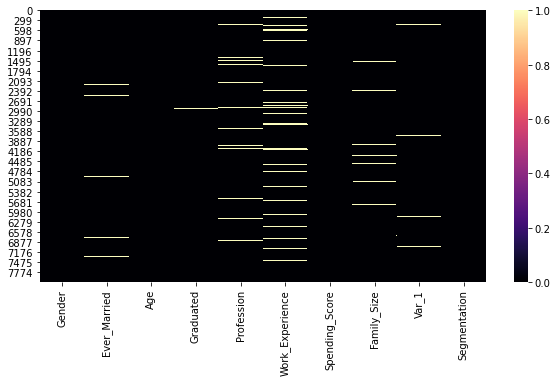

In [130]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data.isnull(),cmap='magma')

In [57]:
# printing the number of missing values in test data

test_data.isnull().sum().sort_values(ascending=False)

Work_Experience    269
Family_Size        113
Ever_Married        50
Profession          38
Var_1               32
Graduated           24
Segmentation         0
Spending_Score       0
Age                  0
Gender               0
ID                   0
dtype: int64

<AxesSubplot:>

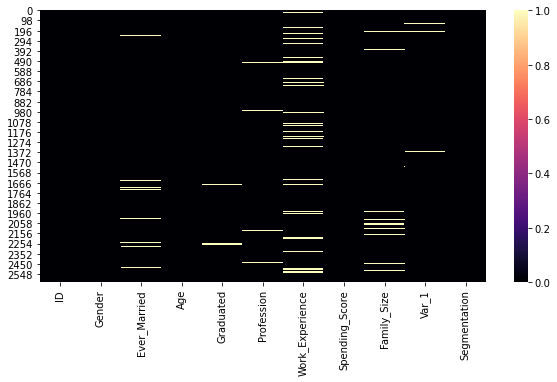

In [135]:
plt.figure(figsize=(10,5))
sns.heatmap(test_data.isnull(),cmap='magma')

<b> Observations : </b><br>
- In both datasets the following columns have missing values:
    - Gender, Ever_Married, Graduated, Profession, ork_Experience,Family_Size,Var_1

- We need to replace these missing values before feeding the data to a machine learning model, with a suitable strategy.
- The missing value treatment will be discussed during data preprocessing.

### 2. Analysing numerical and categorical variables separately

In [65]:
# Dropping the ID column as it doen't contribute to predicting custo,mer group
train_data.drop(columns='ID',inplace=True)

### Numerical variables

In [110]:
numerical_variables = [column for column in train_data.columns if train_data[column].dtypes != 'object']
print(f"Numerical Variables: {numerical_variables}")

Numerical Variables: ['Age', 'Work_Experience', 'Family_Size']


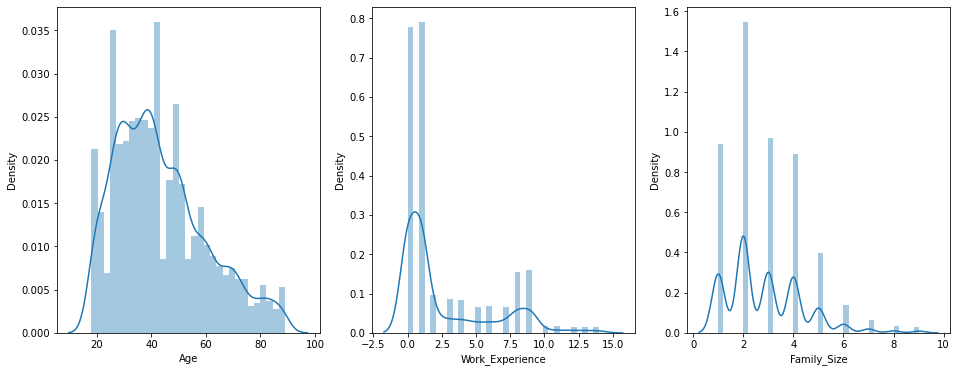

In [109]:
# visualizing distribution of data in numerical_variables

plt.figure(figsize=(16,6))
plt_number = 1

for column_name in numerical_variables:
    if plt_number<=3:
        ax = plt.subplot(1,3,plt_number)
        sns.distplot(train_data[column_name])
        plt.xlabel(column_name)
    plt_number+=1

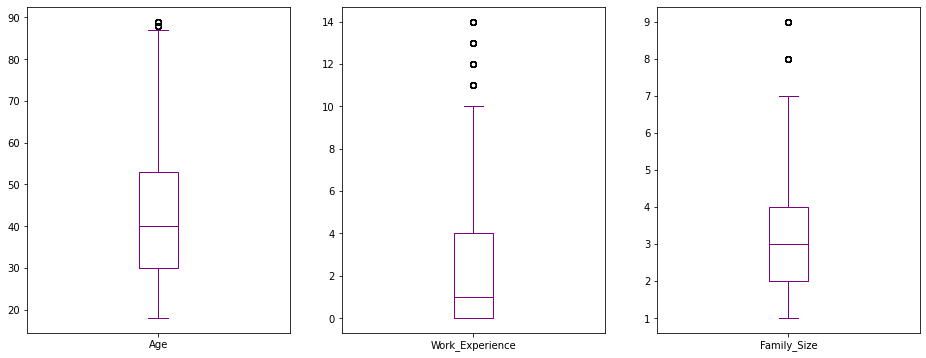

In [143]:
# Checking for outliers in numerical columns
train_data[numerical_variables].plot(kind='box', 
                                     subplots=True,
                                     layout=(1,3),
                                     sharex=False, 
                                     sharey=False, 
                                     figsize=(16,6),
                                     color='purple');

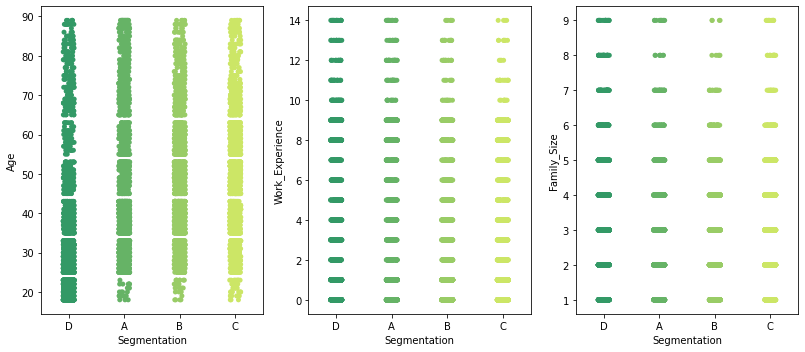

In [185]:
## Visualizing relationship between numerical features and target column
X = train_data.drop(columns = 'Segmentation')
y = train_data.Segmentation

plt.figure(figsize=(15,5), facecolor='white')
plt_number = 1

for column_name in numerical_variables:
    if plt_number<=4 :
        ax = plt.subplot(1,4,plt_number)
        sns.stripplot(y,X[column_name],palette='summer')
    plt_number+=1
plt.tight_layout()

### Categorical variables

In [114]:
categorical_variables = [column for column in train_data.columns if column not in numerical_variables]
categorical_variables

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1',
 'Segmentation']

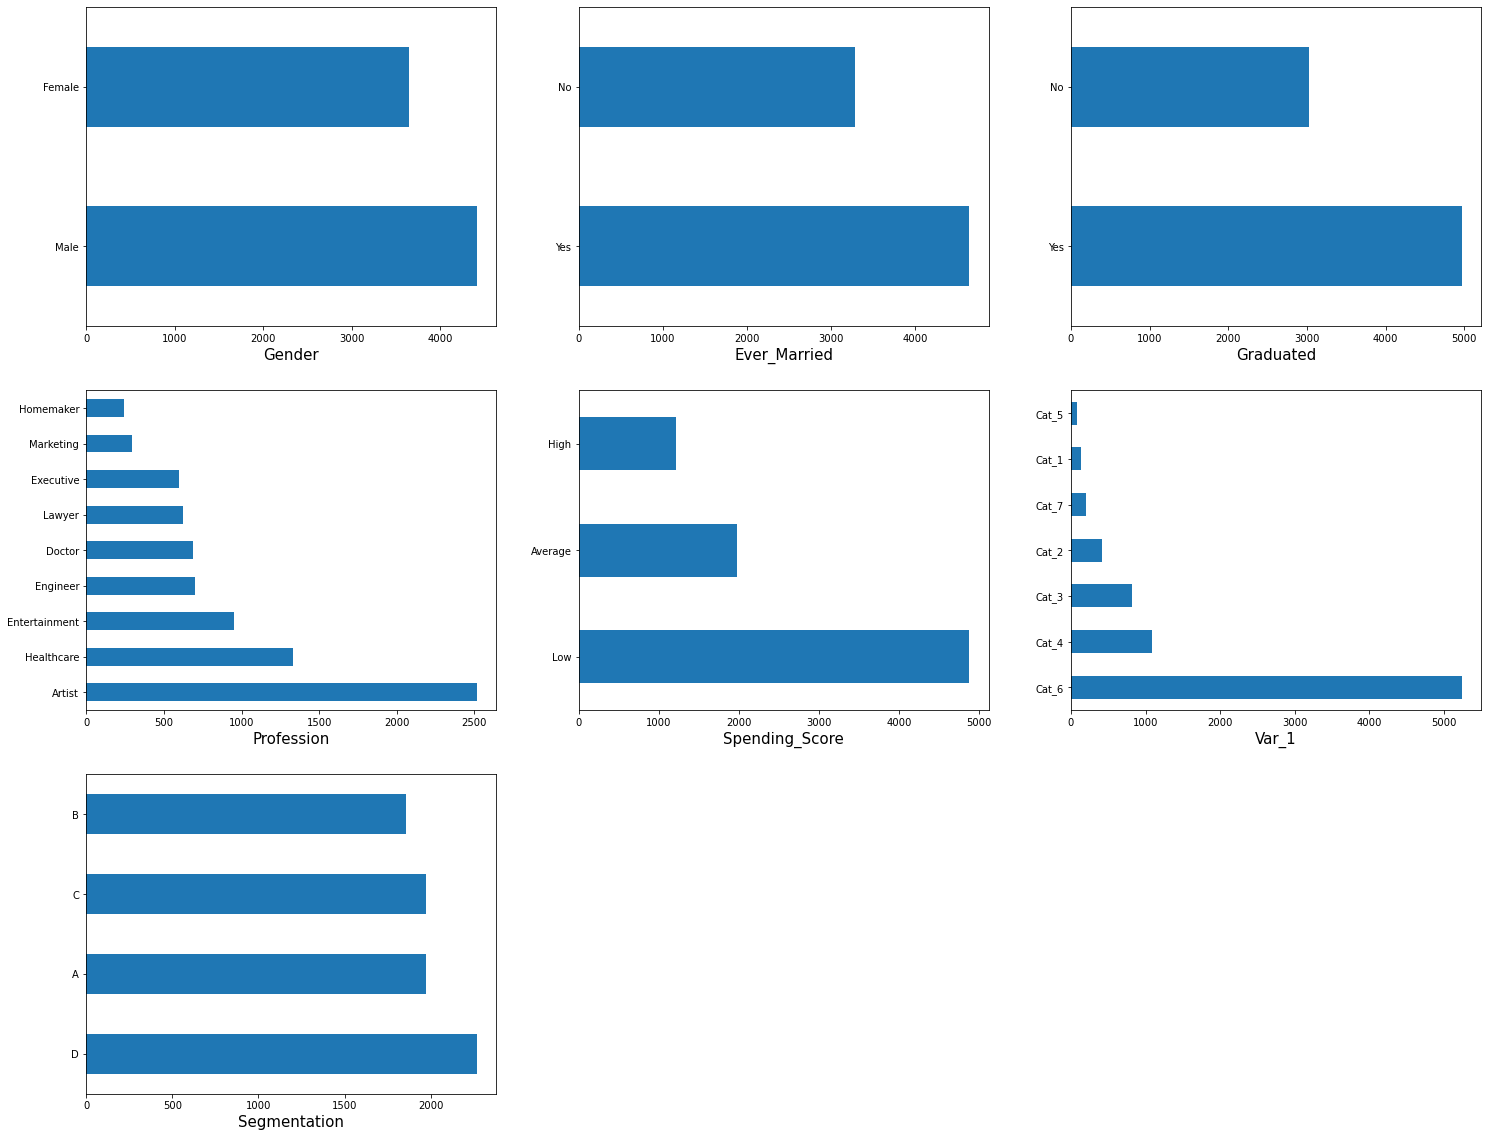

In [172]:
# visualizing categorical_variables

plt.figure(figsize=(25,20))
plt_number = 1

for column_name in categorical_variables:
    if plt_number<=len(categorical_variables):
        ax = plt.subplot(3,3,plt_number)
        train_data[column_name].value_counts().plot.barh()
        plt.xlabel(column_name,fontsize=15)
    plt_number+=1

In [204]:
for column in categorical_variables:
    print(column)
    print(train_data[column].value_counts())
    print('------------------------')

Gender
Male      4417
Female    3651
Name: Gender, dtype: int64
------------------------
Ever_Married
Yes    4643
No     3285
Name: Ever_Married, dtype: int64
------------------------
Graduated
Yes    4968
No     3022
Name: Graduated, dtype: int64
------------------------
Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64
------------------------
Spending_Score
Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64
------------------------
Var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64
------------------------
Segmentation
D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64
------------------------


In [206]:
(train_data.Profession.value_counts()/len(train_data.Profession))*100

Artist           31.184928
Healthcare       16.509668
Entertainment    11.762519
Engineer          8.663857
Doctor            8.527516
Lawyer            7.721864
Executive         7.424393
Marketing         3.619236
Homemaker         3.049083
Name: Profession, dtype: float64

In [212]:
(train_data.Spending_Score.value_counts()/len(train_data.Spending_Score))*100

Low        60.461081
Average    24.467030
High       15.071889
Name: Spending_Score, dtype: float64

In [211]:
(train_data.Var_1.value_counts()/len(train_data.Var_1))*100

Cat_6    64.923153
Cat_4    13.497769
Cat_3    10.188399
Cat_2     5.230540
Cat_7     2.516113
Cat_1     1.648488
Cat_5     1.053545
Name: Var_1, dtype: float64

In [209]:
(train_data.Segmentation.value_counts()/len(train_data.Segmentation)) * 100

D    28.111056
A    24.442241
C    24.417452
B    23.029251
Name: Segmentation, dtype: float64

<b>Observations : </b> <br>
- Gender : There are more Males than females.
- Ever_married : Most of the customers are married.
- Graduated : There are significantly higher number of graduates.
- profession : 31% of customers are artists, followed by 16% Healthcare and 11% entertainment (which accounts for 60% of total customers).
- Spending score: Majority customers(60%) are spending low.
- Var_1 : 65% of customers are in cat_6.
- Segmentation: All the segments have almost equal amount of data.

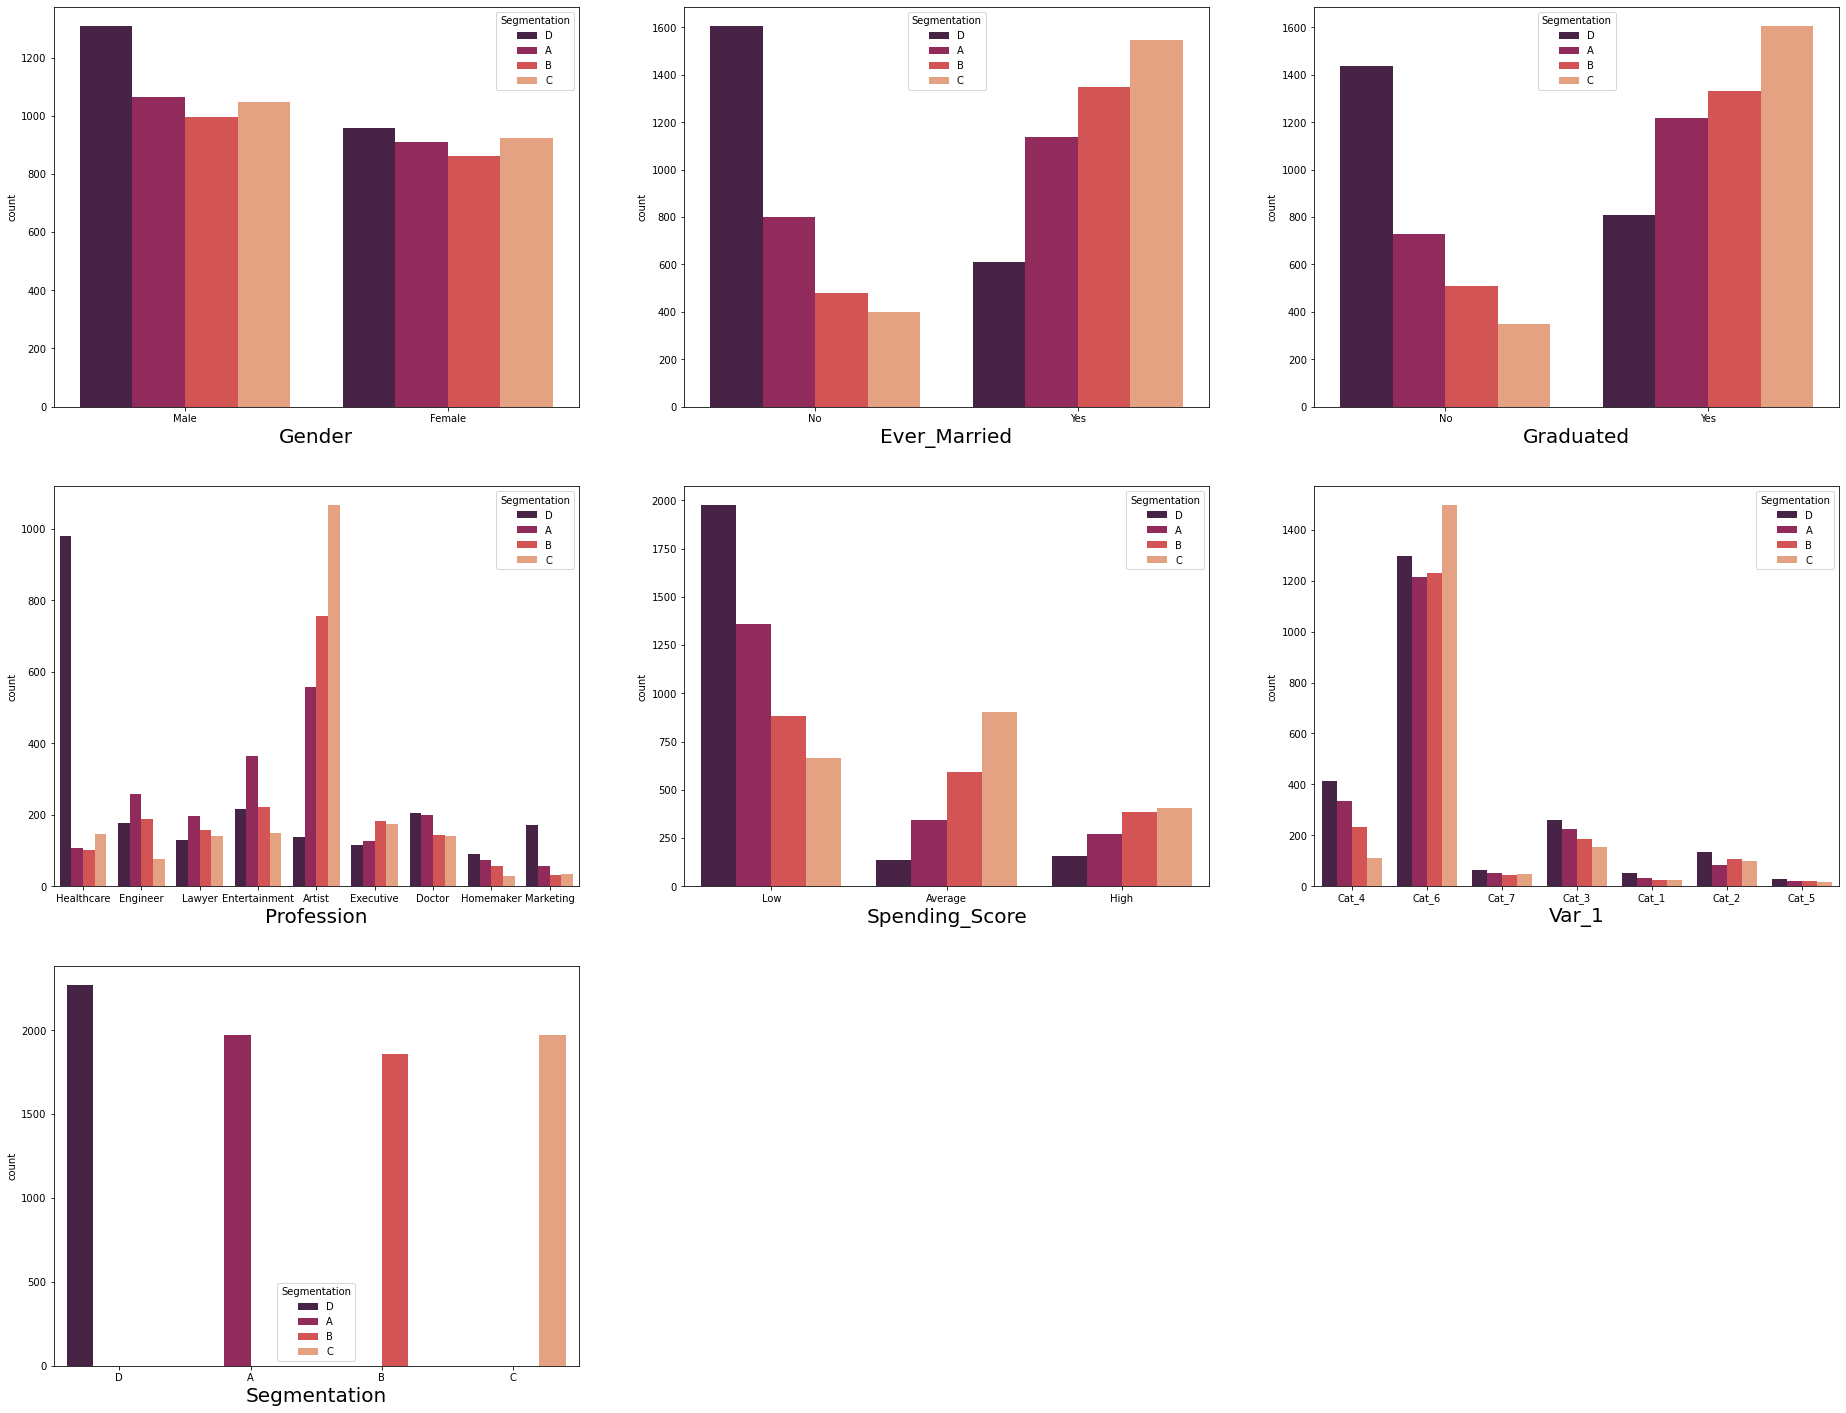

In [192]:
## Visualizing relationship between categorical features and target column
plt.figure(figsize=(32,25))
plt_number = 1

for column_name in categorical_variables:
    if plt_number<=len(categorical_variables):
        ax = plt.subplot(3,3,plt_number)
        sns.countplot(train_data[column_name],palette='rocket',hue=train_data.Segmentation)
        plt.xlabel(column_name,fontsize=20)
    plt_number+=1

<b>Observations : </b> <br>
- Gender : Most Males are in segment D, where as the number of females in each segemnt is almost same.
- Ever_married : Large number of married customers are in customer segment D, while large number of unmarried cutomers are in segment C.
- Graduated : higher number of graduates are in customer segment D, while large number of not graduated customers are in segment C.
- profession : Most artists are in segment C, where as majority healthcare people are in segment D. In entertainment majority are in segment A.
- Spending score: Again higher number of customers spending low are in segment D.
- Var_1 : 65% of customers are in cat_6 and segment c is the dominant segment,followed by D in this variable.
- Segmentation: All the segments have almost equal amount of data.<b>This is a fairly balanced datset</b>

In [202]:
## correlation heatmap

corr_all = train_data.corr()
corr_all

,Age,Work_Experience,Family_Size
Age,1.000000,-0.190789,-0.280517
Work_Experience,-0.190789,1.000000,-0.063234
Family_Size,-0.280517,-0.063234,1.000000


<b>Observations : </b><br>
    - There is not significant correlation between the independent variables.

In [276]:
list(range(1,50,3))

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]